# TASK-2
Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

# IMPORTING LIBRARIES

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [194]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [195]:
data.shape

(200, 5)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [197]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [198]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Drop Feature CustomerID as it will not help in clustering

In [199]:
data.drop('CustomerID',axis = 1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### GENDER FEATURE INFO 

In [200]:
gender_counts = data['Gender'].value_counts()
total_counts = gender_counts.sum()
labels=gender_counts.keys()

In [201]:
gender_counts

Female    112
Male       88
Name: Gender, dtype: int64

In [202]:
total_counts

200

### GENDER DISTRIBUTION 

(-1.1117659135464324,
 1.1239347631373071,
 -1.109501984520054,
 1.1272394548751712)

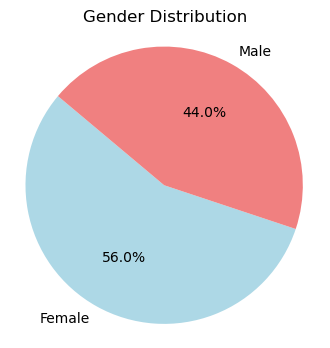

In [203]:
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.keys(), autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')

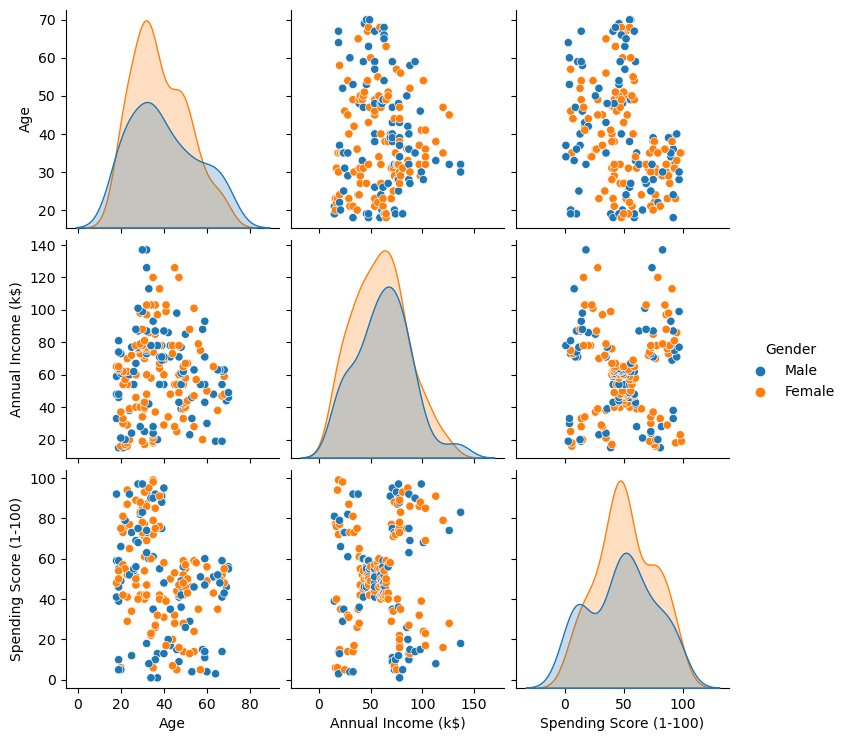

In [204]:
sns.pairplot(data,hue="Gender")
plt.show()

# LABEL ENCODING OF GENDER FEATURE

In [205]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [206]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standard scaling features

In [207]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [208]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(2,11):
    kmeans = KMeans (n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append (kmeans.inertia_)
display (wcss)

[270.70426664306717,
 157.70400815035944,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 44.91118554999014,
 37.73640346254161,
 32.37525368158287,
 29.090568897369717]

# ELBOW METHOD

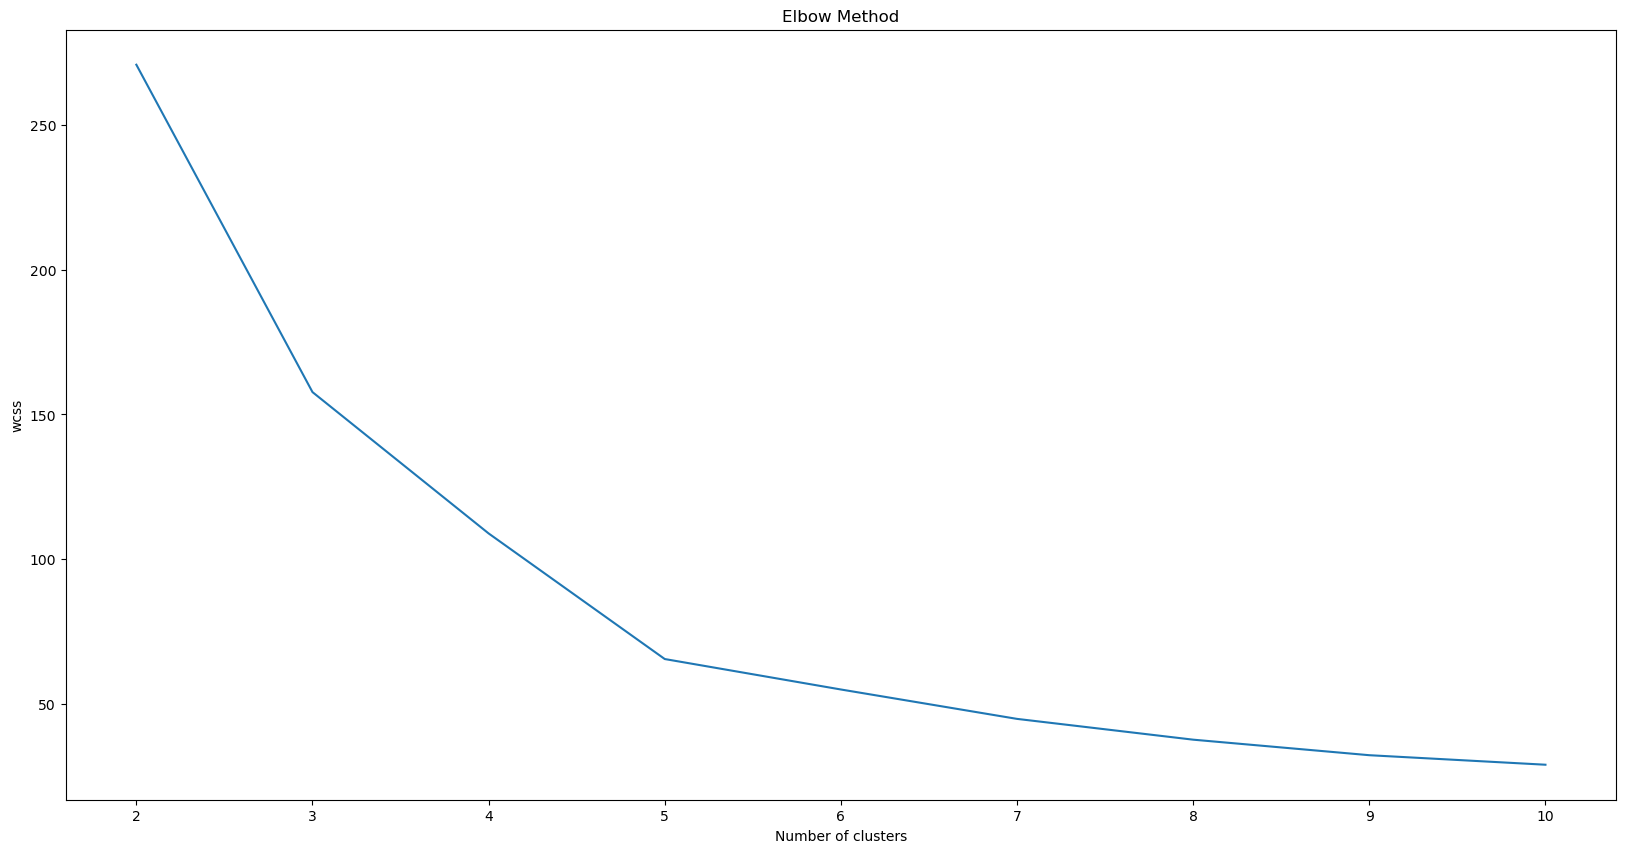

In [209]:
#Create a Line Graph with WCSS (Sum of distances) 
plt.figure(figsize=(20, 10))
plt.plot (range(2,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel ('wcss')
plt.show()

### K- Means clustering

In [210]:
#Create the Model and predictions 
kmeans =  KMeans (n_clusters =  5 , init = 'k-means++')
kmeans = kmeans.fit(X)
y_kmeans = kmeans.labels_
display (y_kmeans)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2,
       1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0,
       2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [211]:
data['Cluster'] = y_kmeans

# Clusters visualization

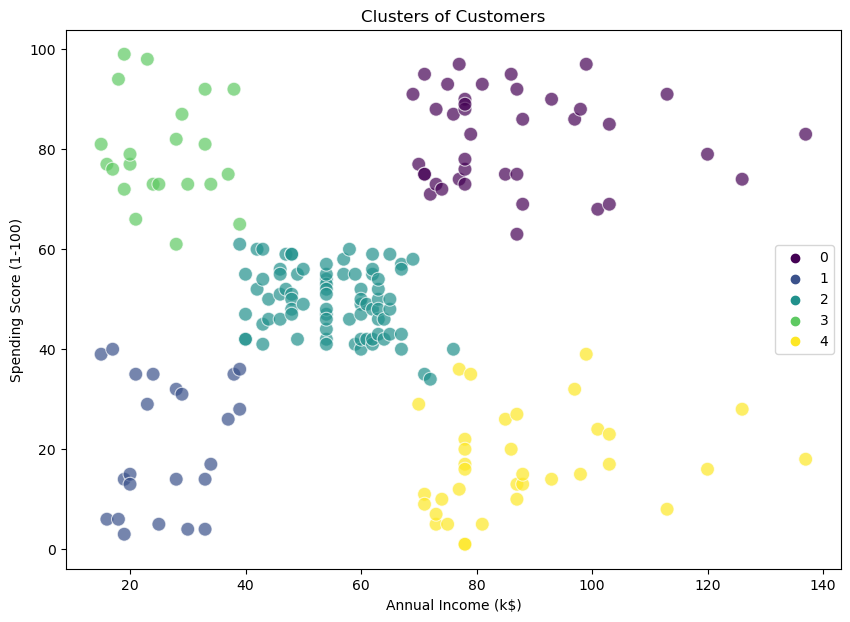

In [212]:
#Create Clusters 
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [213]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# SILHOUETTE SCORE CALCULCATION

In [214]:
# Calculate the Silhouette Score
sil_score = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.5546571631111091
